In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')


In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
# run the last n rows 
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [9]:
# check unique value
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [11]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [12]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [13]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [14]:
# print columns  
df.head(0)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [15]:
popular_categories =df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
popular_categories


Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

# bar chart for popular_categories

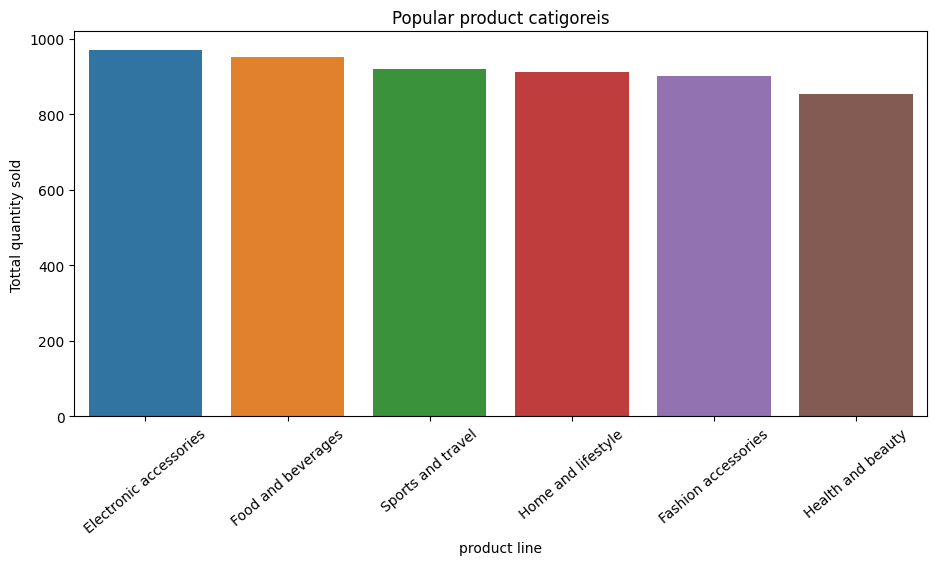

In [16]:
plt.figure(figsize=(11,5))
sns.barplot(x=popular_categories.index,y=popular_categories.values)
plt.xlabel('product line')
plt.ylabel('Tottal quantity sold')
plt.title('Popular product catigoreis')
plt.xticks(rotation=40)
plt.show()

In [17]:
# payment method
payment=df['Payment'].value_counts()
payment

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Payment Method ')

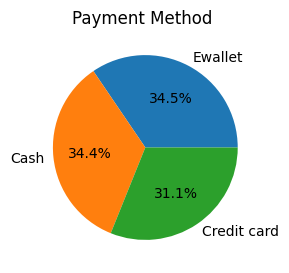

In [18]:
plt.figure(figsize=(7,3))
plt.pie(payment.values,labels=payment.index,autopct='%1.1f%%')
plt.title('Payment Method ')

# What are the busiest times of day and busiest days of the week for our stor (s)?

In [19]:
df['Time']=pd.to_datetime(df['Time'])
df['Date']=pd.to_datetime(df['Date'])


In [20]:
df['time']=df['Time'].dt.hour
df['Day of week ']=df['Date'].dt.day_name()

In [21]:
# see what happen to our dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,time,Day of week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-04-12 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-04-12 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-04-12 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-04-12 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-04-12 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday


## we added 'day of week' and 'time' to our dataset to know what the most time we sales in the day ,and the most day we sale in week 

In [22]:
# we need to add one more column ['hour']
df['hour']=df['Time'].dt.hour

In [23]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,time,Day of week,hour
738,197-77-7132,B,Mandalay,Member,Male,Electronic accessories,91.56,8,36.6240,769.1040,2019-01-12,2023-04-12 18:22:00,Ewallet,732.48,4.761905,36.6240,6.0,18,Saturday,18
176,175-54-2529,A,Yangon,Member,Male,Food and beverages,22.17,8,8.8680,186.2280,2019-03-03,2023-04-12 17:01:00,Credit card,177.36,4.761905,8.8680,9.6,17,Sunday,17
466,440-59-5691,C,Naypyitaw,Member,Female,Health and beauty,37.15,7,13.0025,273.0525,2019-02-08,2023-04-12 13:12:00,Credit card,260.05,4.761905,13.0025,7.7,13,Friday,13
942,809-69-9497,A,Yangon,Normal,Female,Home and lifestyle,45.68,10,22.8400,479.6400,2019-01-19,2023-04-12 19:30:00,Ewallet,456.80,4.761905,22.8400,5.7,19,Saturday,19
200,606-80-4905,C,Naypyitaw,Member,Female,Sports and travel,19.15,6,5.7450,120.6450,2019-01-29,2023-04-12 10:01:00,Credit card,114.90,4.761905,5.7450,6.8,10,Tuesday,10


In [24]:
df['hour'].describe()

count    1000.000000
mean       14.910000
std         3.186857
min        10.000000
25%        12.000000
50%        15.000000
75%        18.000000
max        20.000000
Name: hour, dtype: float64

In [25]:
hour=df.groupby('hour')['Invoice ID'].count()
hour

hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Invoice ID, dtype: int64

In [ ]:
df['day_of_week']=df[]

In [28]:
week=df.groupby('Day of week ')['Invoice ID'].count()
week

Day of week 
Friday       139
Monday       125
Saturday     164
Sunday       133
Thursday     138
Tuesday      158
Wednesday    143
Name: Invoice ID, dtype: int64

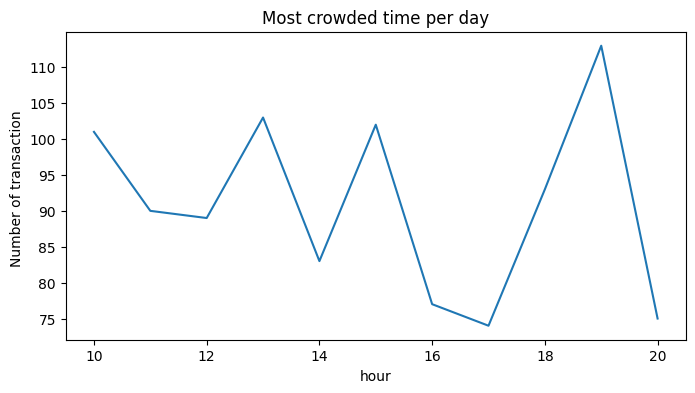

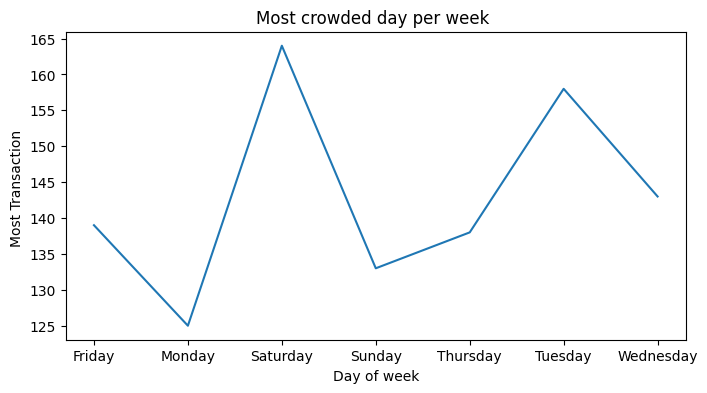

In [29]:
plt.figure(figsize=(8,4))
plt.plot(hour.index,hour.values)
plt.xlabel('hour')
plt.ylabel('Number of transaction ')
plt.title ('Most crowded time per day')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(week.index,week.values)
plt.xlabel('Day of week')
plt.ylabel('Most Transaction ')
plt.title('Most crowded day per week ')
plt.show ()

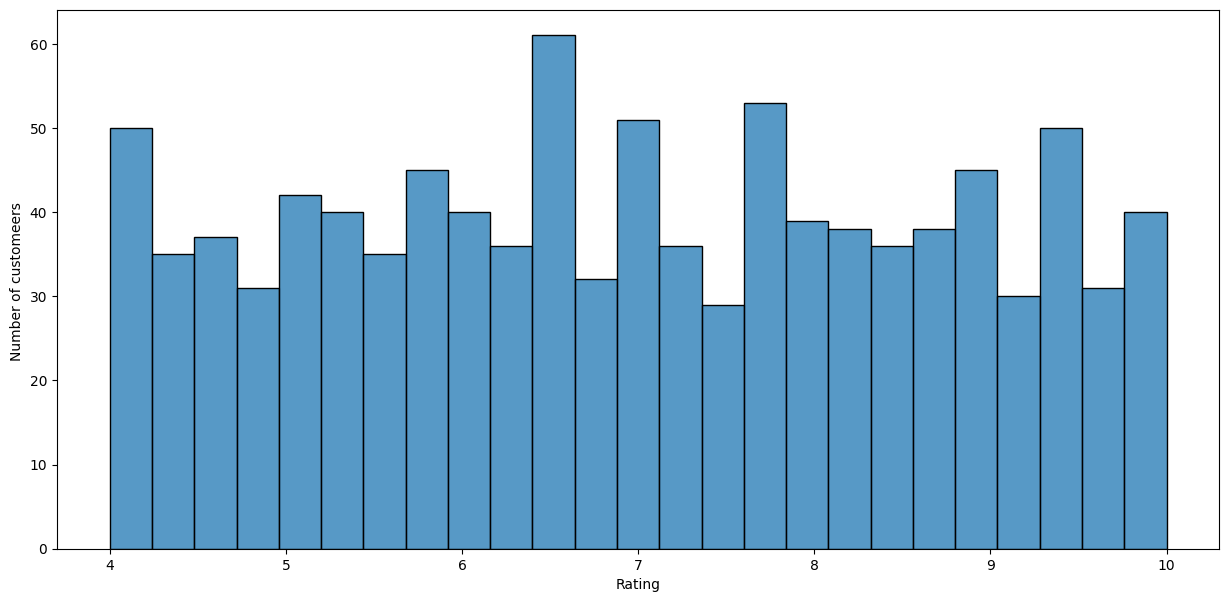

In [35]:
plt.figure(figsize=(15,7))
sns.histplot(df['Rating'],bins=25)
plt.xlabel('Rating')
plt.ylabel('Number of customeers ')
plt.show()

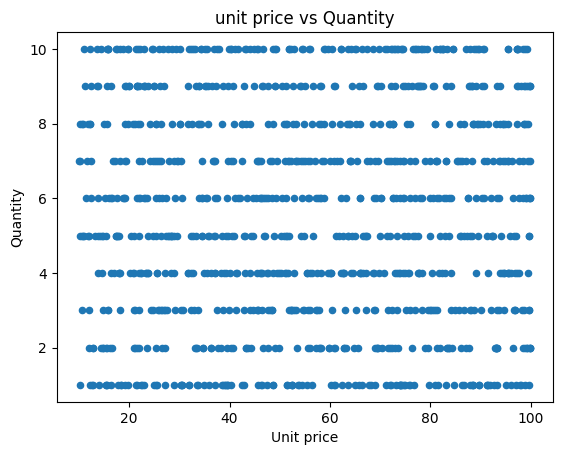

In [37]:
df.plot.scatter(x='Unit price', y='Quantity')
plt.xlabel('Unit price')
plt.ylabel('Quantity')
plt.title('unit price vs Quantity')
plt.show()

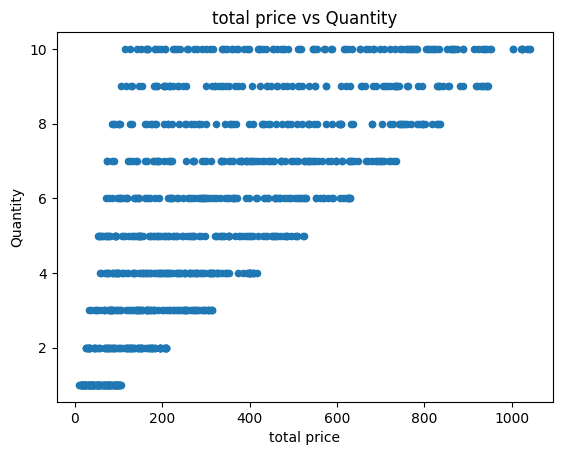

In [38]:
df.plot.scatter(x='Total',y='Quantity')
plt.xlabel('total price')
plt.ylabel('Quantity')
plt.title('total price vs Quantity')
plt.show()

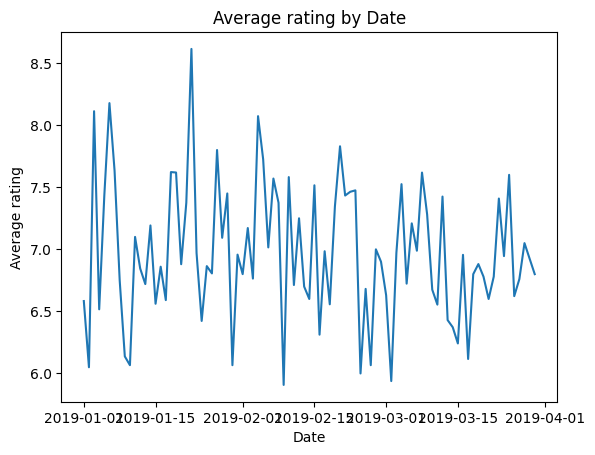

In [39]:
avg_rating_by_date=df.groupby('Date')['Rating'].mean()

plt.plot(avg_rating_by_date.index,avg_rating_by_date.values)
plt.xlabel('Date')
plt.ylabel('Average rating')
plt.title('Average rating by Date')

plt.show()

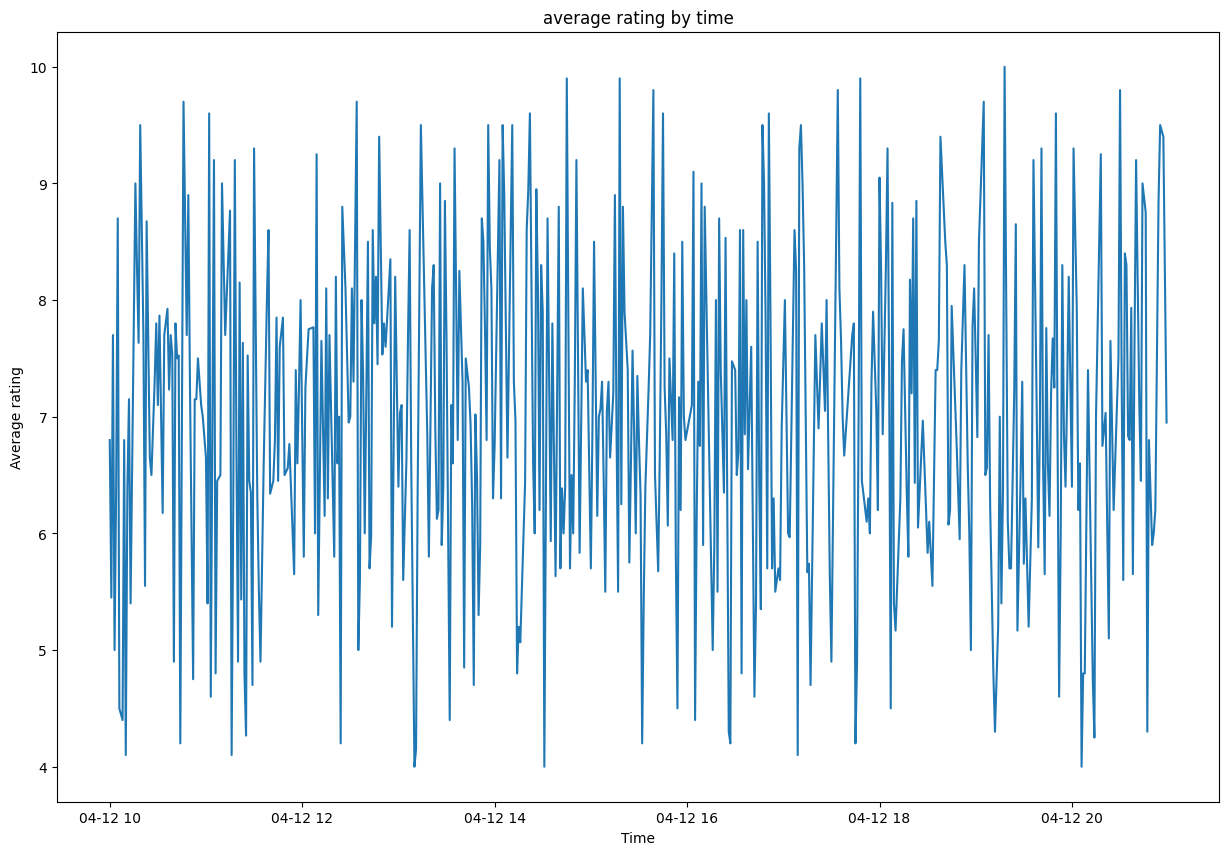

In [40]:
avg_rating_by_time=df.groupby('Time')['Rating'].mean()

plt.figure(figsize=(15,10))
plt.plot(avg_rating_by_time.index,avg_rating_by_time.values)
plt.xlabel('Time')
plt.ylabel('Average rating')
plt.title('average rating by time')
plt.show()

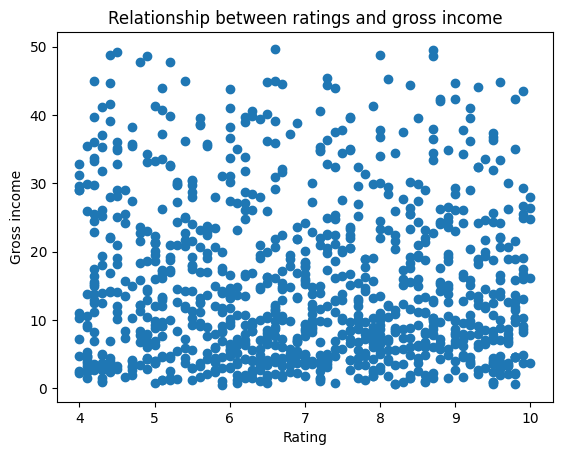

In [41]:
# plot the relationship between ratings and gross income
plt.scatter(df['Rating'], df['gross income'])
plt.xlabel('Rating')
plt.ylabel('Gross income')
plt.title('Relationship between ratings and gross income')
plt.show()
